In [1]:
import pandas as pd, matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import datetime as dt
import datetime
from sklearn.linear_model import LinearRegression


In [2]:
def csv(file):
    df = pd.read_csv(file, sep = ",", skiprows = 2)
    df2 = pd.read_csv("data_table_for_daily_death_trends__arizona.csv", sep = "," , skiprows = 2)
    df["New Deaths"] = df2["New Deaths"]
    df["Doses Per Day"] = 0
    df["Dates"] = df["Date"].replace({"Jan":"01", "Feb":"02","Mar":"03","Apr":"04","May":"05","Jun":"06","Jul":"07","Aug":"08","Sep":"09","Oct":"10","Nov":"11","Dec":"12"}, regex = True)
    df["Total Doses Administered"] = df["Total Doses Administered"].fillna(0)
    for i in range(1, len(df["Total Doses Administered"])-1):
        a = pd.to_numeric(df["Total Doses Administered"])
        df.loc[i-1,"Doses Per Day"] = abs((int(a.iloc[i-1]) - int(a.iloc[i])))
        a.append(df["Doses Per Day"])
    df.drop(labels = [0], axis = 0)
    df.drop([0, 1, 2], axis = 0,inplace = True)
    del df["7-Day Moving Avg"]
    del df["State"]
    return df


In [3]:
def clean_dose():
    df = csv("data_table_for_daily_case_trends__arizona.csv")
    lst_dates = []
    for i in range(349,674):
        df = df.drop(index=i)
    return df

In [9]:
def figure1():
    df1 = csv("data_table_for_daily_case_trends__arizona.csv")
    x = [dt.datetime.strptime(d,'%m %d %Y').date() for d in df1["Dates"]]
    plt.figure(figsize=(15,15), dpi= 80)
    plt.title("Positive Covid Cases in AZ", fontsize = 25)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m %d %Y'))
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=50))
    plt.plot(x,df1['New Cases'])
    plt.xlabel("Dates", fontsize = 20)
    plt.ylabel("New Cases", fontsize = 20)
    plt.xticks(fontsize=14, rotation=45)
    plt.yticks(fontsize=14)

In [10]:
def figure2():
    df2 = csv("data_table_for_daily_case_trends__arizona.csv")
    plt.figure(figsize=(15,15), dpi= 80)
    plt.title("Deaths By Covid in AZ",fontsize = 25)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m %d %Y'))
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=50))
    plt.style.use('ggplot')
    lst = []
    for i in df2['Dates']:
        lst.append(i)
    x = [dt.datetime.strptime(d,'%m %d %Y').date() for d in df2["Dates"]]
    lst = []
    for i in df2['New Deaths']:
        lst.append(i)
    x_pos = [i for i, _ in enumerate(x)]
    plt.bar(x,lst,width=0.8, color='black')
    plt.xlabel("Dates", fontsize = 20)
    plt.ylabel("New Deaths", fontsize = 20)
    plt.xticks(fontsize=14, rotation=45)
    plt.yticks(fontsize=14)

In [11]:
def figure3():
    df3 = clean_dose()
    plt.figure(figsize=(15,15), dpi= 80)
    plt.title("Covid Vaccines Supplied in AZ", fontsize = 25)
    lst = []
    dlst=[]
    for i in df3["Doses Per Day"]:
        lst.append(i)
    x = np.array(df3["Dates"])
    y = np.array(lst)
    plt.scatter(x, y)
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=35))
    x2=[]
    y2=[]
    for i in range(349):
        x2.append(int(i))
    for b in x2:
        y2.append(-97*b+33974)
    plt.plot(x2, y2) 
    plt.xlabel("Dates",fontsize = 20)
    plt.ylabel("Doses Per Day", fontsize = 20)
    plt.gca().invert_xaxis()
    plt.xticks(fontsize=14, rotation=45)
    plt.yticks(fontsize=14)

In [12]:
def figure4():
    df4 = clean_dose()
    plt.figure(figsize=(15,15), dpi= 80)
    plt.title("Total Covid Vaccines Supplied in AZ",fontsize = 25)
    lst = []
    for i in df4["Total Doses Administered"]:
        lst.append(i)
    x = np.array(df4["Dates"])
    y = np.array(lst)
    plt.scatter(x,y)
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=35))
    plt.xlabel("Dates",fontsize = 20)
    plt.ylabel("Doses Per Day", fontsize = 20)
    plt.gca().invert_xaxis()
    plt.xticks(fontsize=14, rotation=45)
    plt.yticks(fontsize=14)

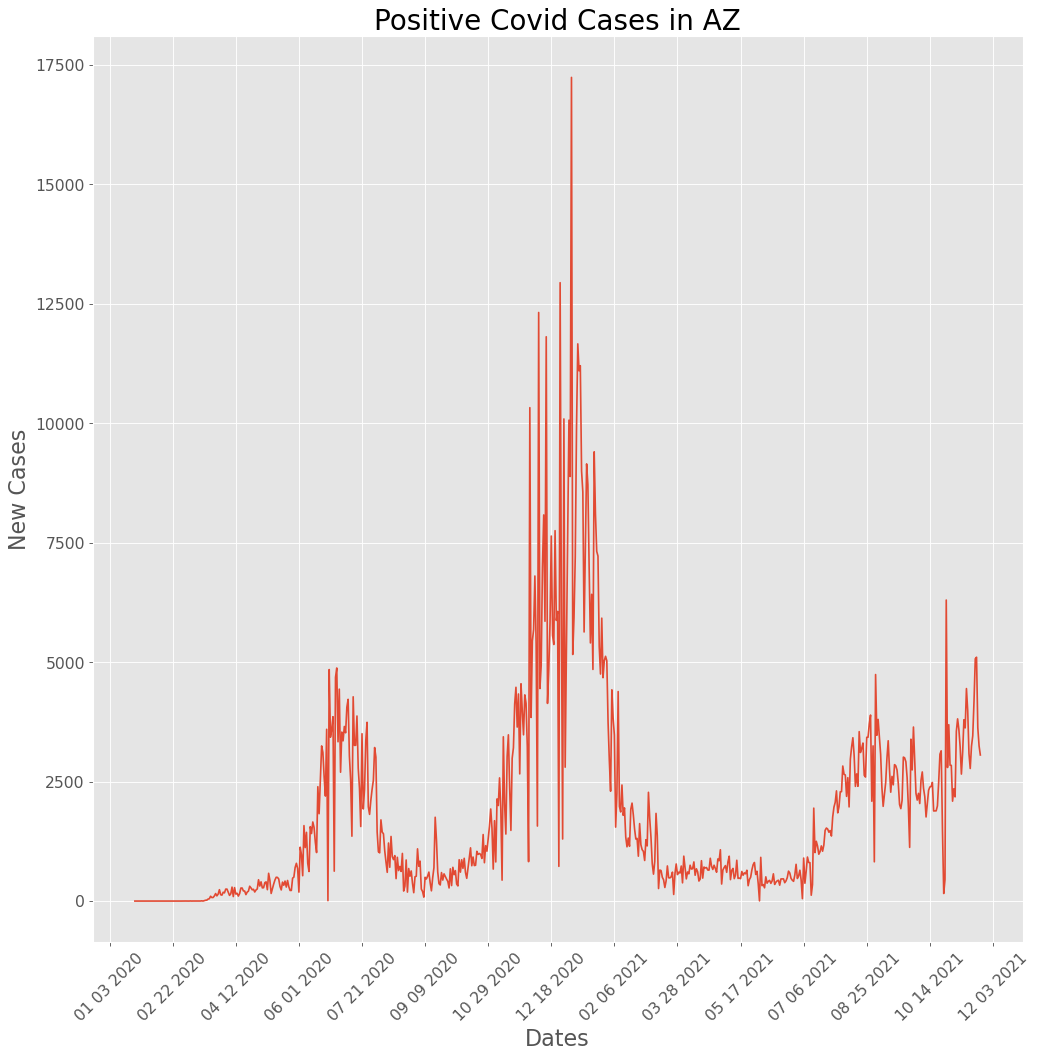

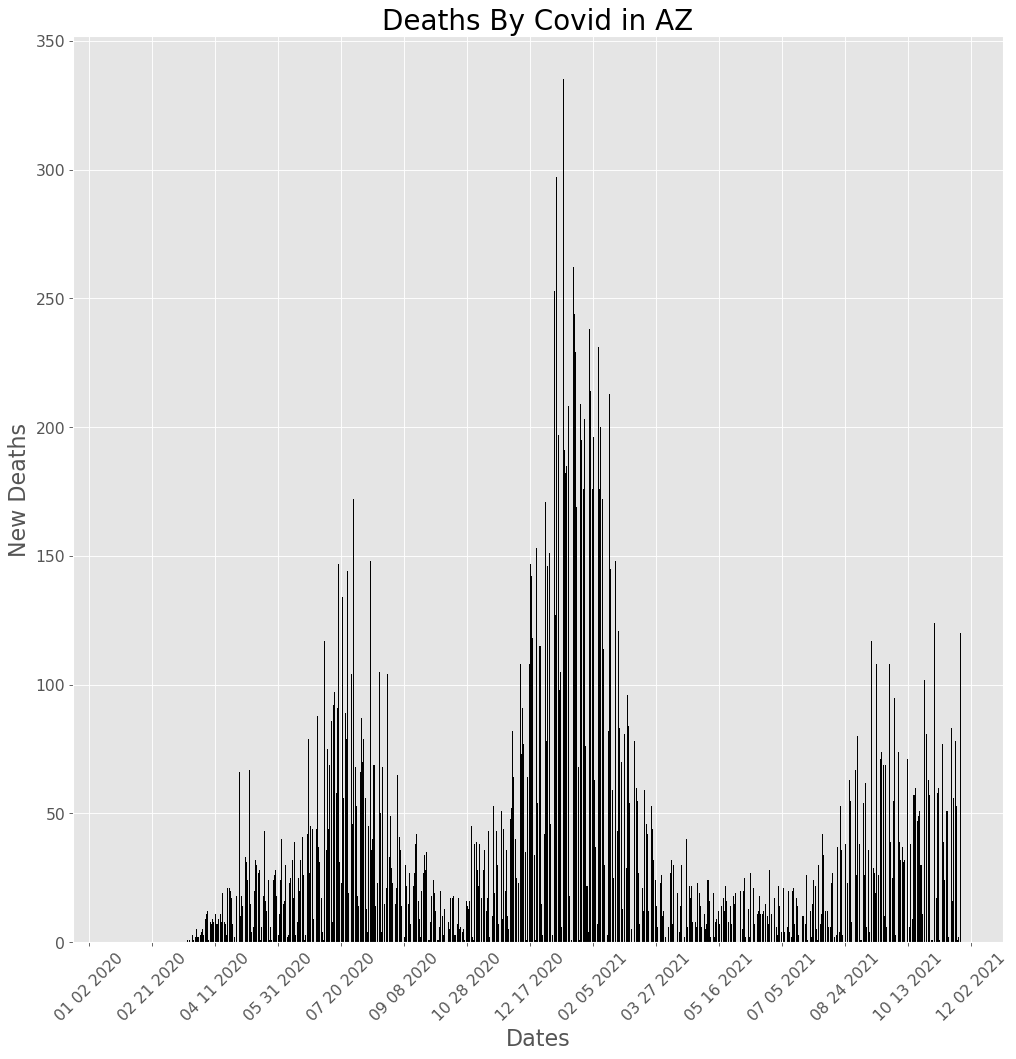

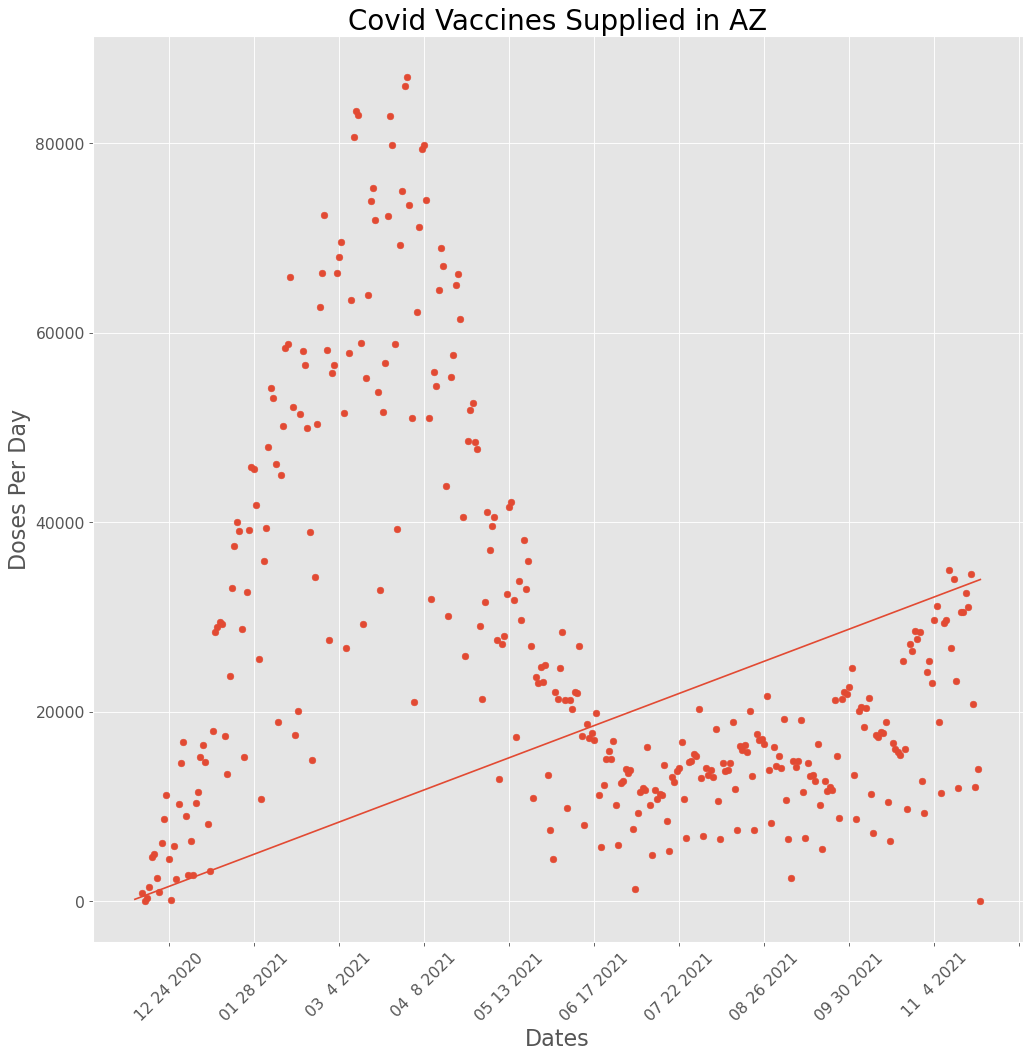

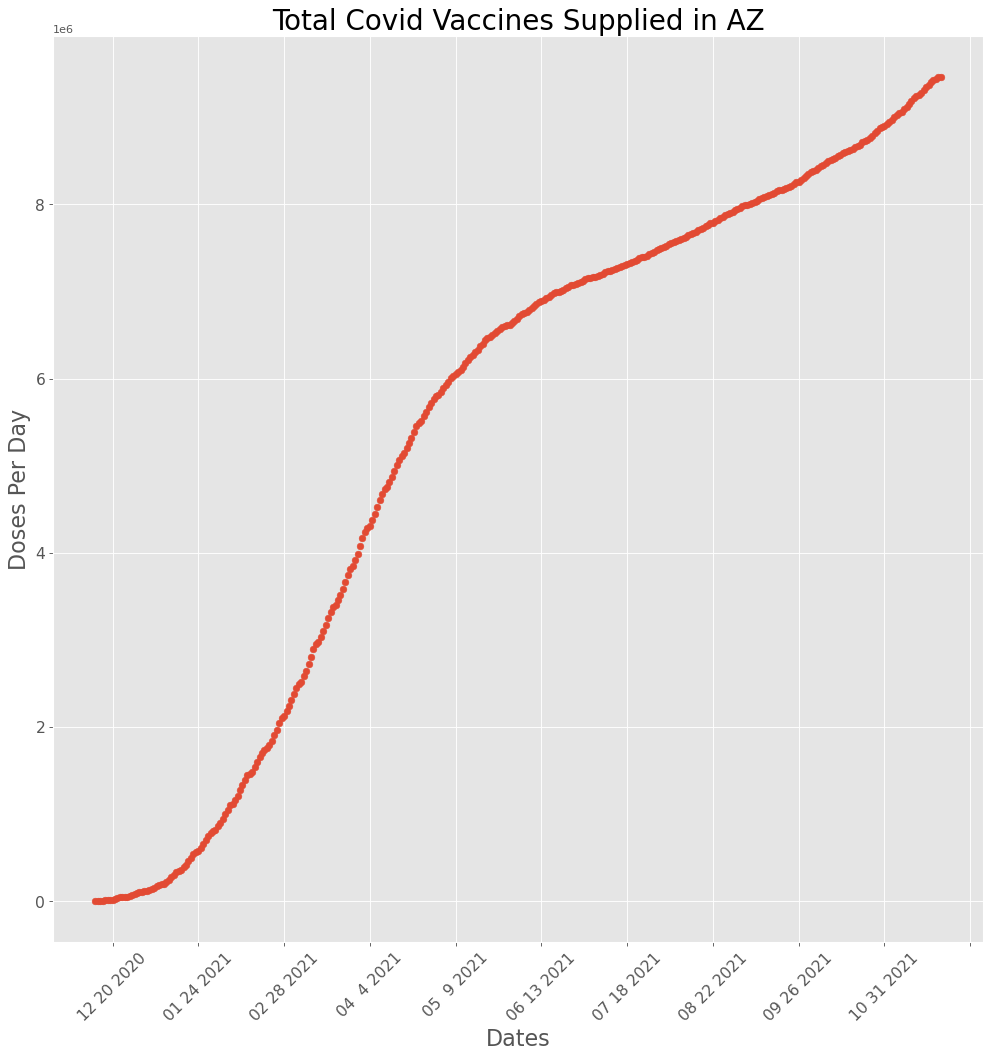

In [13]:
figure1()
figure2()
figure3()
figure4()
plt.show()